# Problem 2, Parts A-B: Boosted Decision Tree

In this Jupyter notebook, we will train a boosted decision tree on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts A-B by filling in the sections marked `# TODO` and running all cells.

In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# print dimensions of the datasets
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

# filter out rows containing the -999 sentinel in ANY feature
train_mask = (X_train != -999).all(axis=1)
test_mask = (X_test != -999).all(axis=1)

X_train_filtered = X_train[train_mask]
X_test_filtered = X_test[test_mask]
y_train_filtered = y_train[train_mask]
y_test_filtered = y_test[test_mask]

# print the new dimensions of the filtered datasets
print("X_train_filtered shape: ", X_train_filtered.shape)
print("y_train_filtered shape: ", y_train_filtered.shape)
print("X_test_filtered shape: ", X_test_filtered.shape)
print("y_test_filtered shape: ", y_test_filtered.shape)

X_train shape:  (104051, 50)
y_train shape:  (104051,)
X_test shape:  (26013, 50)
y_test shape:  (26013,)
X_train_filtered shape:  (103675, 50)
y_train_filtered shape:  (103675,)
X_test_filtered shape:  (25921, 50)
y_test_filtered shape:  (25921,)


In [30]:
# sanity checks after filtering
print("Number of -999 values in X_train_filtered:", np.sum(X_train_filtered == -999))
print("Number of -999 values in X_test_filtered:", np.sum(X_test_filtered == -999))
print("Number of nan values in X_train_filtered:", np.sum(np.isnan(X_train_filtered)))
print("Number of nan values in X_test_filtered:", np.sum(np.isnan(X_test_filtered)))
print("Number of inf values in X_train_filtered:", np.sum(np.isinf(X_train_filtered)))
print("Number of inf values in X_test_filtered:", np.sum(np.isinf(X_test_filtered)))
print("All train entries finite:", np.isfinite(X_train_filtered).all())
print("All test entries finite:", np.isfinite(X_test_filtered).all())

# print all min and max values for each feature of X
for feature_idx in range(X_train_filtered.shape[1]):
	train_min = np.min(X_train_filtered[:, feature_idx])
	train_max = np.max(X_train_filtered[:, feature_idx])
	test_min = np.min(X_test_filtered[:, feature_idx])
	test_max = np.max(X_test_filtered[:, feature_idx])
	print(
		f"Feature {feature_idx:2d} | "
		f"train[min,max]=({train_min:.6g}, {train_max:.6g}) | "
		f"test[min,max]=({test_min:.6g}, {test_max:.6g})"
    )

Number of -999 values in X_train_filtered: 0
Number of -999 values in X_test_filtered: 0
Number of nan values in X_train_filtered: 0
Number of nan values in X_test_filtered: 0
Number of inf values in X_train_filtered: 0
Number of inf values in X_test_filtered: 0
All train entries finite: True
All test entries finite: True
Feature  0 | train[min,max]=(0, 17.0573) | test[min,max]=(0, 16.0604)
Feature  1 | train[min,max]=(0.0707482, 8.80282) | test[min,max]=(0.0596913, 7.66563)
Feature  2 | train[min,max]=(0.0123806, 4747.67) | test[min,max]=(0.0392624, 4266.45)
Feature  3 | train[min,max]=(0.104697, 0.704169) | test[min,max]=(0.109527, 0.736804)
Feature  4 | train[min,max]=(-0.156118, 0.179012) | test[min,max]=(-0.136905, 0.174658)
Feature  5 | train[min,max]=(0, 0.703859) | test[min,max]=(0, 0.604472)
Feature  6 | train[min,max]=(0, 6.24108) | test[min,max]=(0, 4.60401)
Feature  7 | train[min,max]=(0.041932, 0.982981) | test[min,max]=(0.0335104, 0.989713)
Feature  8 | train[min,max]=(2.

In [2]:
# ! pip install xgboost

In [4]:
import xgboost as xgb
from xgboost import XGBClassifier
# help(XGBClassifier)

## Problem 1A

Using the MiniBooNE dataset and XGBoost, train a boosted decision tree on the
training dataet. Use the Scikit-learn API xgboost.XGBClassifier. For an initial choice of hyperparam-
eters use 100 trees (n_estimators), maximum tree depth (max_depth) of 10, learning rate (learning_-
rate) of 0.1, colsample_bytree of 0.8, and subsample of 0.8.

In [20]:
bdt = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, colsample_bytree=0.8, subsample=0.8)

bdt.fit(X_train_filtered, y_train_filtered)

# retrieve predictions and take index [:, 1] corresponding to signal
preds_bdt = bdt.predict_proba(X_test_filtered)[:, 1]

Plot the receiver operating characteristic (ROC) curve using the testing dataset. What area under the curve
(AUC) and accuracy do you achieve “out of the box”?

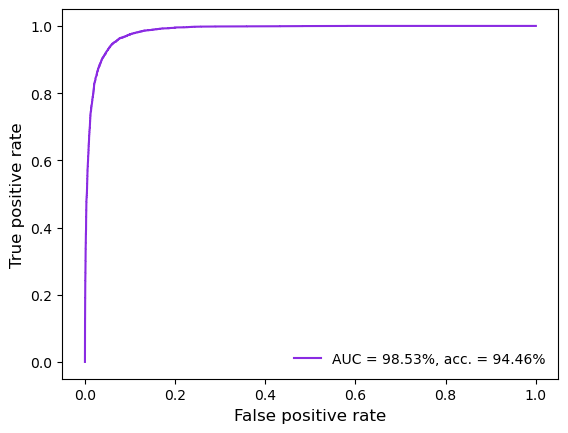

Out of the box AUC score:  0.9853333691641539


In [21]:
from roc_helper import plot_roc
from sklearn.metrics import roc_auc_score

plot_roc(y_test_filtered, preds_bdt)

print("Out of the box AUC score: ", roc_auc_score(y_test_filtered, preds_bdt))

## Problem B

Plot the F -score for all the 10 “most important” features using xgboost.plot_-
importance. Which feature is the most important?

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

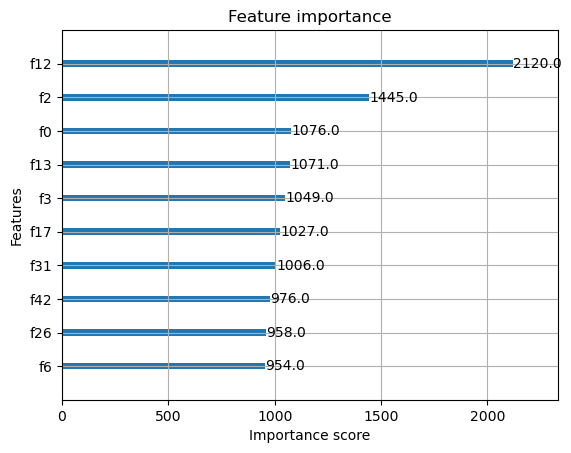

In [22]:
xgb.plot_importance(bdt, max_num_features=10)

Plot this feature using the testing dataset in a 1D histogram separately for signal and background. For the
histogram binning, use 100 bins from the minimum value of this feature to the maximum value of this
feature in the testing dataset. What do you notice about this feature?

In [23]:
print("feature importances:", bdt.feature_importances_)
mostImportantFeatureIndex = bdt.feature_importances_.argmax()
print("index of most important feature:", mostImportantFeatureIndex)

feature importances: [0.15744042 0.04005584 0.06105227 0.01814788 0.00976868 0.01615861
 0.01002657 0.00559988 0.01047468 0.01171287 0.00847025 0.01755949
 0.02532551 0.01314844 0.00589246 0.02176288 0.21118349 0.01247786
 0.00749157 0.00852642 0.01507393 0.00540459 0.01422502 0.01035366
 0.00716532 0.01012424 0.02838334 0.01274519 0.00867581 0.00912567
 0.00829527 0.05480712 0.00753342 0.00927151 0.00614356 0.00722038
 0.01005467 0.00703015 0.00856305 0.00719818 0.00736588 0.00731477
 0.00925392 0.00582307 0.01144512 0.0112385  0.00703905 0.00983341
 0.00538994 0.00562628]
index of most important feature: 16


feature min, max: 0.0 16.0604
unique values count: 25085


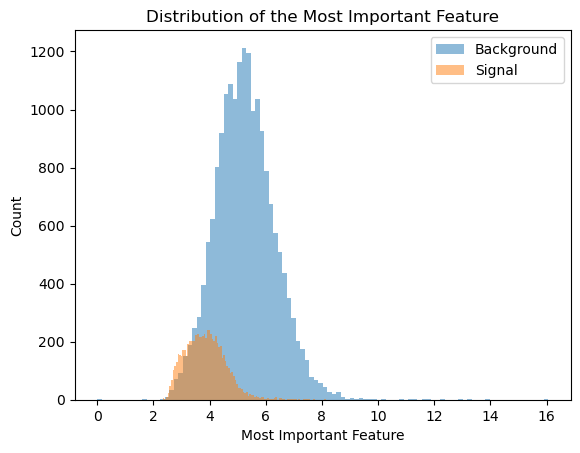

In [24]:
import numpy as np
import matplotlib.pyplot as plt

feat_vals = X_test_filtered[:, 0]

xmin = np.nanmin(feat_vals)
xmax = np.nanmax(feat_vals)

signal_vals = X_test_filtered[y_test_filtered == 1, 0]
background_values = X_test_filtered[y_test_filtered == 0, 0]

print("feature min, max:", xmin, xmax)
print("unique values count:", len(np.unique(feat_vals)))

# Create 100 bins between min and max (101 edges)
bins = 100

plt.hist(background_values, bins=bins, alpha=0.5, label="Background")
plt.hist(signal_vals, bins=bins, alpha=0.5, label="Signal")
plt.xlabel("Most Important Feature")
plt.ylabel("Count")
plt.title("Distribution of the Most Important Feature")
plt.legend()
plt.show()

# Problem 2, Parts C-E: Neural Network

In this Jupyter notebook, we will train a neural network on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts C-E by filling in the sections marked `# TODO` and running all cells.

## Problem C
Using the MiniBooNE dataset and the Keras Model API, train a neural network
with 3 hidden layers each with 128 units and tanh activations. The final layer should have sigmoid activa-
tion. Use the binary crossentropy loss function, the SGD optimizer with a learning rate of 0.01 (which is the
default), and a batch size of 128. Train the model for 50 epochs.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

inputs = Input(shape=(X_train_filtered.shape[1],))
x = Dense(128, activation='tanh')(inputs)
x = Dense(128, activation='tanh')(x)
x = Dense(128, activation='tanh')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train_filtered, epochs=50, batch_size=128, validation_data=(X_test_filtered, y_test_filtered))

# retrieve predictions
preds_nn = model.predict(X_test_filtered)

Epoch 1/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8346 - loss: 0.3774 - val_accuracy: 0.8222 - val_loss: 0.3697
Epoch 2/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8362 - loss: 0.3771 - val_accuracy: 0.8201 - val_loss: 0.4279
Epoch 3/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8347 - loss: 0.3778 - val_accuracy: 0.8436 - val_loss: 0.3662
Epoch 4/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8395 - loss: 0.3685 - val_accuracy: 0.8534 - val_loss: 0.3622
Epoch 5/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8348 - loss: 0.3803 - val_accuracy: 0.8255 - val_loss: 0.4077
Epoch 6/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8283 - loss: 0.3922 - val_accuracy: 0.8310 - val_loss: 0.3969
Epoch 7/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8294 - loss: 0.3974 - val_accuracy: 0.8367 - val_loss: 0.3765
Epoch 8/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8320 - loss: 0.3908 - val_accuracy: 0.

Plot the receiver operating characteristic (ROC) curve using the testing dataset. What AUC and accuracy
do you achieve “out of the box”?

Out of the box AUC score:  0.9166319674612791


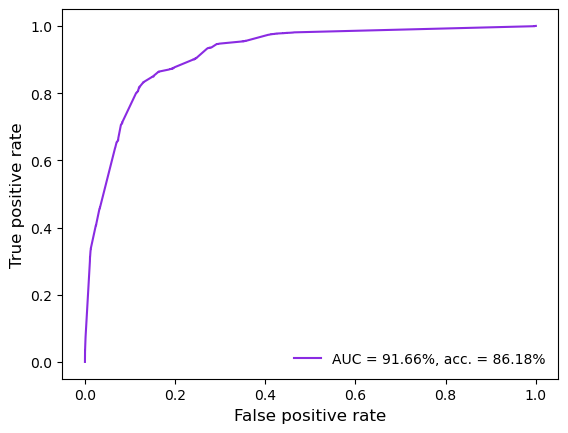

In [11]:
from roc_helper import plot_roc
print("Out of the box AUC score: ", roc_auc_score(y_test_filtered, preds_nn))
outoftheboxplot = plot_roc(y_test_filtered, preds_nn)
plt.close()

## Problem D
Swap out the tanh activations for ReLU activations, while keeping everything else
the same. Does the network train effectively? Why or why not?

In [25]:
inputs = Input(shape=X_train_filtered.shape[1])
x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_filtered, y_train_filtered, epochs=50, batch_size=128, validation_data=(X_test_filtered, y_test_filtered))

# retrieve predictions
preds_nn = model.predict(X_test_filtered)

Epoch 1/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7161 - loss: nan - val_accuracy: 0.7163 - val_loss: 0.5985
Epoch 2/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7190 - loss: 0.5947 - val_accuracy: 0.7163 - val_loss: 0.5964
Epoch 3/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7190 - loss: 0.5940 - val_accuracy: 0.7163 - val_loss: 0.5964
Epoch 4/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7190 - loss: 0.5939 - val_accuracy: 0.7163 - val_loss: 0.5964
Epoch 5/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7190 - loss: 0.5939 - val_accuracy: 0.7163 - val_loss: 0.5964
Epoch 6/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7190 - loss: 0.5939 - val_accuracy: 0.7163 - val_loss: 0.5964
Epoch 7/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7190 - loss: 0.5939 - val_accuracy: 0.7163 - val_loss: 0.5964
Epoch 8/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7190 - loss: 0.5939 - val_accuracy: 0.716

ReLU without scaling score:  0.5


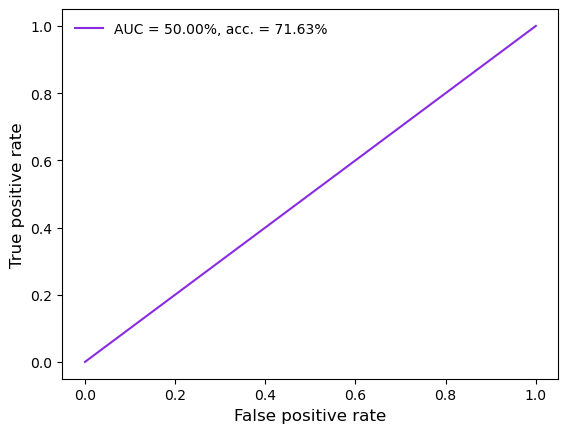

In [26]:
print("ReLU without scaling score: ", roc_auc_score(y_test_filtered, preds_nn))
relu_roc = plot_roc(y_test_filtered, preds_nn)
plt.close()

For the features all values are already positive so ReLU acts like a linear model. In problem E we will standardize the input features so it shouldnt be a problem anymore. 

## Problem E
Now, we will make two minor changes to the network with ReLU activations:
preprocessing and the optimizer.
For the feature preprocessing use sklearn.preprocessing.StandardScaler to standardize the input
features. Note you should ﬁt the standard scaler to the training data only and apply it to both the training
and testing data. For the optimizer, use Adam with a learning rate of 0.001 (which is the default) instead of
SGD. Train the model for 50 epochs

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

inputs = Input(shape=X_train_scaled.shape[1:])
outputs = Dense(128, activation='relu')(inputs)
outputs = Dense(128, activation='relu')(outputs)
outputs = Dense(128, activation='relu')(outputs)
outputs = Dense(1, activation='sigmoid')(outputs)
model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_filtered, epochs=50, batch_size=128, validation_data=(X_test_scaled, y_test_filtered))

preds_nn = model.predict(X_test_scaled)

Epoch 1/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9292 - loss: 0.1767 - val_accuracy: 0.9384 - val_loss: 0.1567
Epoch 2/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9434 - loss: 0.1444 - val_accuracy: 0.9446 - val_loss: 0.1416
Epoch 3/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9461 - loss: 0.1362 - val_accuracy: 0.9448 - val_loss: 0.1389
Epoch 4/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9494 - loss: 0.1299 - val_accuracy: 0.9465 - val_loss: 0.1361
Epoch 5/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9505 - loss: 0.1256 - val_accuracy: 0.9473 - val_loss: 0.1330
Epoch 6/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9521 - loss: 0.1214 - val_accuracy: 0.9466 - val_loss: 0.1352
Epoch 7/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9526 - loss: 0.1184 - val_accuracy: 0.9465 - val_loss: 0.1354
Epoch 8/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9547 - loss: 0.1152 - val_accuracy: 0.

In [31]:
# print all min and max values for each feature of X
for feature_idx in range(X_train_scaled.shape[1]):
	train_min = np.min(X_train_scaled[:, feature_idx])
	train_max = np.max(X_train_scaled[:, feature_idx])
	test_min = np.min(X_test_scaled[:, feature_idx])
	test_max = np.max(X_test_scaled[:, feature_idx])
	print(
		f"Feature {feature_idx:2d} | "
		f"train_scaled[min,max]=({train_min:.6g}, {train_max:.6g}) | "
		f"test_scaled[min,max]=({test_min:.6g}, {test_max:.6g})"
	)


Feature  0 | train_scaled[min,max]=(-4.18872, 10.4987) | test_scaled[min,max]=(-4.18872, 9.64031)
Feature  1 | train_scaled[min,max]=(-1.65225, 8.49562) | test_scaled[min,max]=(-1.6651, 7.17405)
Feature  2 | train_scaled[min,max]=(-0.687905, 24.7797) | test_scaled[min,max]=(-0.687761, 22.1983)
Feature  3 | train_scaled[min,max]=(-2.99522, 7.06401) | test_scaled[min,max]=(-2.91417, 7.61163)
Feature  4 | train_scaled[min,max]=(-13.2572, 13.6022) | test_scaled[min,max]=(-11.7174, 13.2533)
Feature  5 | train_scaled[min,max]=(-1.30515, 4.41768) | test_scaled[min,max]=(-1.30515, 3.6096)
Feature  6 | train_scaled[min,max]=(-2.82584, 15.3475) | test_scaled[min,max]=(-2.82584, 10.5805)
Feature  7 | train_scaled[min,max]=(-11.1038, 2.25953) | test_scaled[min,max]=(-11.2234, 2.35513)
Feature  8 | train_scaled[min,max]=(-4.07694, 13.6915) | test_scaled[min,max]=(-4.16267, 14.3793)
Feature  9 | train_scaled[min,max]=(-3.21021, 7.801) | test_scaled[min,max]=(-2.93826, 8.02441)
Feature 10 | train_sca

We see now the features have data points in the negative range as well, so ReLU can act better on it in a non-linear way.

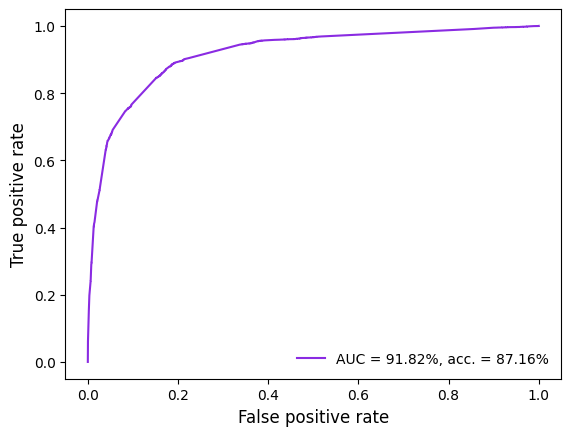

In [ ]:
outoftheboxplot

Scaled AUC score:  0.9853748961867481


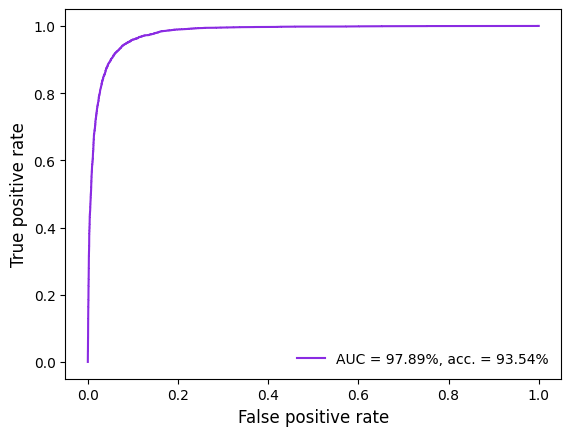

In [ ]:
print("Scaled AUC score: ", roc_auc_score(y_test_filtered, preds_bdt))
relu_scaled_roc =plot_roc(y_test_filtered, preds_nn)
plt.close()

It performs around 6-9% better than the out of the box NN version. The scaled NN AUC closesly resembles the BDT version, only slightly (0.5%) worse.

# Optional refinements

Add further refinements to the neural network in the last step of the previous exercise. Try and get the classification as good as you can. For example, consider batchnorm, layer initialization, dropout, wider/deeper nets, .... . If you can't find a significant improvement, just show the code and report on the result of a few experiments (I tried X because I thought/saw Y, result was Z).

In [34]:
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal, GlorotUniform
from tensorflow.keras.optimizers import Adam

def run_experiment(hidden_layers, use_batchnorm=False, dropout_rate=0.0, kernel_initializer='glorot_uniform', epochs=50):
    inputs = Input(shape=(X_train_scaled.shape[1],))
    x = inputs
    for units in hidden_layers:
        x = Dense(units, activation='relu', kernel_initializer=kernel_initializer)(x)
        if use_batchnorm:
            x = BatchNormalization()(x)
        if dropout_rate > 0:
            x = Dropout(dropout_rate)(x)

    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train_scaled, y_train_filtered,
        epochs=epochs,
        batch_size=128,
        validation_data=(X_test_scaled, y_test_filtered),
        verbose=0
    )

    preds = model.predict(X_test_scaled, verbose=0).ravel()
    auc = roc_auc_score(y_test_filtered, preds)
    print(f"AUC: {auc:.6f}")
    _ = plot_roc(y_test_filtered, preds)
    plt.close()
    return model, history, auc

### Experiment 1: Batch Normalization

AUC: 0.981344


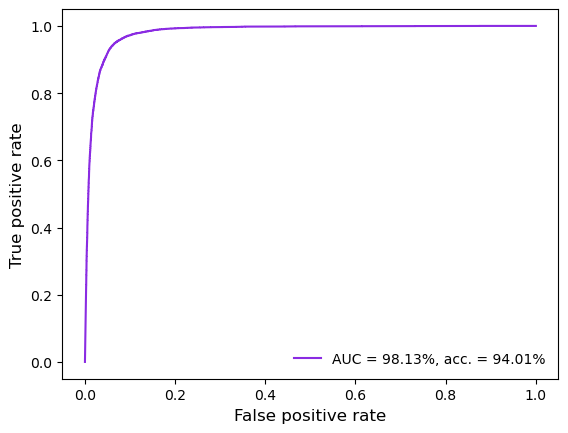

In [35]:
model_bn, history_bn, auc_bn = run_experiment(
    hidden_layers=[128, 128, 128],
    use_batchnorm=True,
    dropout_rate=0.0,
    kernel_initializer=GlorotUniform(),
    epochs=50
)

### Experiment 2: Dropout

In [ ]:
model_do, history_do, auc_do = run_experiment(
    hidden_layers=[128, 128, 128],
    use_batchnorm=False,
    dropout_rate=0.2,
    kernel_initializer=GlorotUniform(),
    epochs=50
)

### Experiment 3: Layer Initialization (He Normal)

In [ ]:
model_he, history_he, auc_he = run_experiment(
    hidden_layers=[128, 128, 128],
    use_batchnorm=False,
    dropout_rate=0.0,
    kernel_initializer=HeNormal(),
    epochs=50
)

### Experiment 4: Wider and Deeper Networks

In [ ]:
model_wide, history_wide, auc_wide = run_experiment(
    hidden_layers=[256, 256, 128],
    use_batchnorm=True,
    dropout_rate=0.2,
    kernel_initializer=HeNormal(),
    epochs=50
)

model_deep, history_deep, auc_deep = run_experiment(
    hidden_layers=[128, 128, 128, 64, 64],
    use_batchnorm=True,
    dropout_rate=0.2,
    kernel_initializer=HeNormal(),
    epochs=50
)

### Compare Optional Experiments

In [ ]:
import pandas as pd

optional_results = pd.DataFrame(
    [
        ("BatchNorm", auc_bn),
        ("Dropout", auc_do),
        ("He init", auc_he),
        ("Wider net", auc_wide),
        ("Deeper net", auc_deep),
    ],
    columns=["experiment", "auc"]
).sort_values("auc", ascending=False).reset_index(drop=True)

optional_results